******
<font size="20"> <center> Air-bed and Breakfast (Airbnb)<center> <br> </font> 
<font size="20"> <center> Seattle, Washington <center> <br> </font> 
******

<img src="airbnb.jpg" alt="Airbnb">

# <font size="5"> Let's import some important liberaries for our project! </font>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1) Business understanding


<font size="4"> 1. Does climatological seasons in Seattle impact the price of airbnb listings?  <br> </font>
<font size="4"> 2. Which month have maximum number of listings and which month have minimum? <br> </font>
<font size="4"> 3. What is the distribution of unique prices? <br> </font>



# Step 2) Data understanding 

In [2]:
# First we load the calendar csv file into pandas dataframe and identifying columns with values of our interest 

df = pd.read_csv('calendar.csv')

# Here we remove the dollar sign from price column to calculate average price
df['price'] = df['price'].replace({'\$':''}, regex = True)

# using .head() we can have 5 row values of our data frame
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df.shape

(1393570, 4)

In [4]:
# There are some values we in the thousands and we should remove the comma from the string before converting
# the price column into integer

df['price'] = df['price'].str.replace(',', '').astype(float)

In [5]:
#Let us separate date into year, month, and day to analyze some of the calendars 

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [6]:
# Since we only have few dates in 2017 we filtered and select only 2016

df = df[df['year'] == 2016]
df.shape

(1385934, 7)

According to University of Nebraska Lincoln the Seattle are climatology has the one long rainy season and summer season. The detailed information can be accessed on <a href="https://drought.unl.edu/archive/climographs/SeattleANC.htm"> University of Nebraska-Lincoln Drought Monitoring website</a> <br> 
<img src="SeaTacomaMTMP.jpg" alt="Seattle Annual Climatology">

In [7]:
# Seattle have two distinct seasons; long rainy season (fall, winter, and spring) and summer season. 
# Here are the four traditional seasons 

df_rainy = df.loc[df['month'].isin(['10','11','12','1','2','3','4','5'])]
df_summer = df.loc[df['month'].isin(['6','7', '8', '9'])]

## Check for missing value or NaN 

<font size ="4"> All missing values are assigned as NaN. All the price designnated as NaN has a corresponding False (f) value of column name "available". Therefore we will only work on available data assigned as True (t) for both rainy and summer seasons.<font> 

In [8]:
# Filtering available (av) airbnb units during summer 
av_df_summer = df_summer[df_summer['available'].str.match('t')]
av_df_summer.head()

,listing_id,date,available,price,year,month,day
149,241032,2016-06-01,t,85.0,2016,6,1
150,241032,2016-06-02,t,85.0,2016,6,2
151,241032,2016-06-03,t,85.0,2016,6,3
152,241032,2016-06-04,t,85.0,2016,6,4
153,241032,2016-06-05,t,85.0,2016,6,5


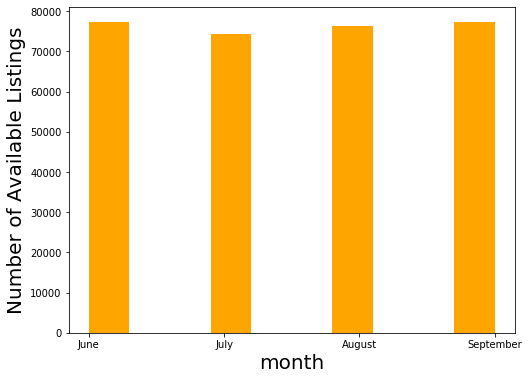

In [9]:
# Number of listings in each months during summer season
plt.figure(figsize=(8,6))
x = [6, 7, 8, 9]
num_summer = plt.hist(av_df_summer['month'], color = "orange")
plt.xlabel('month', fontsize=20)
plt.ylabel('Number of Available Listings', fontsize=20)
plt.xticks(x, ('June', 'July', 'August', 'September'))
plt.savefig("Summer_Count.jpg")

In [10]:
# Filtering available (av) airbnb units during summer season
av_df_rainy = df_rainy[df_rainy['available'].str.match('t')]
av_df_rainy.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
9,241032,2016-01-13,t,85.0,2016,1,13
10,241032,2016-01-14,t,85.0,2016,1,14
14,241032,2016-01-18,t,85.0,2016,1,18


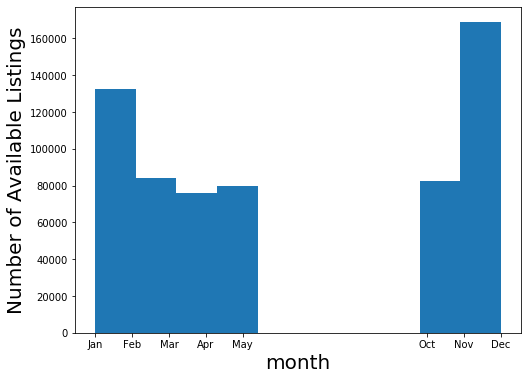

In [11]:
# Number of listings in each months during rainy season
plt.figure(figsize=(8,6))
x = [10, 11, 12, 1, 2, 3, 4, 5]
num_summer = plt.hist(av_df_rainy['month'])
plt.xlabel('month', fontsize=20)
plt.ylabel('Number of Available Listings', fontsize=20)
plt.xticks(x, ('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'))
plt.savefig("Rainy_Count.jpg")

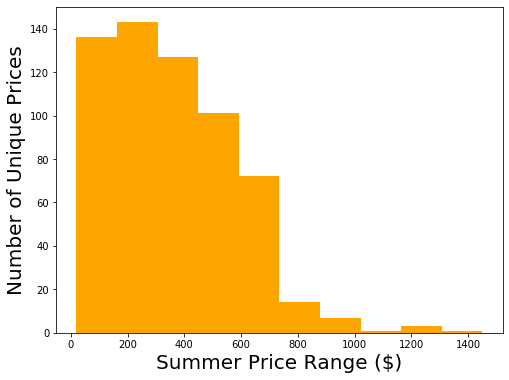

In [12]:
# Identifying unique values and plot a histogram to make sense of the price distribution for summer season
av_df_price_summer = av_df_summer['price'].unique()
plt.figure(figsize=(8,6))
plt.hist(av_df_price_summer, color = "orange")
plt.xlabel('Summer Price Range ($)', fontsize=20)
plt.ylabel('Number of Unique Prices', fontsize=20)
plt.savefig("Summer_Unique_Count.jpg")

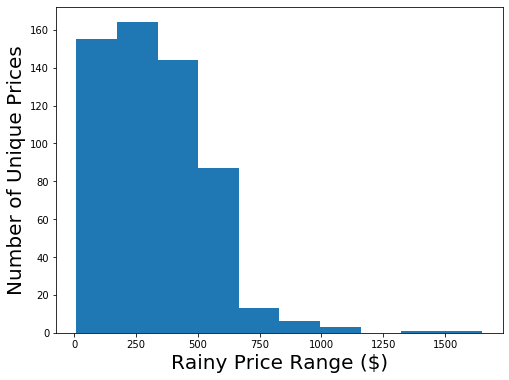

In [13]:
# Identifying unique values and plot a histogram to make sense of the price distribution for rainy season
av_df_price_rainy = av_df_rainy['price'].unique()
plt.figure(figsize=(8,6))
plt.hist(av_df_price_rainy)
plt.xlabel('Rainy Price Range ($)', fontsize=20)
plt.ylabel('Number of Unique Prices', fontsize=20)
plt.savefig("Rainy_Unique_Count.jpg")

# Step 3) Data Analysis

<font size = "6"> Statistical analysis of the price of listings for rainy and summer seasons <font>

In [14]:
# The listings price that is greater than or less than $200 for both rainy and summer seasons
RP_ls_200 = sum(i < 200  for i in av_df_rainy['price'])
SP_ls_200 = sum(i < 200  for i in av_df_summer['price'])
RP_gr_200 = sum(i > 200  for i in av_df_rainy['price'])
SP_gr_200 = sum(i > 200  for i in av_df_summer['price'])

In [15]:
print([RP_ls_200,SP_ls_200,RP_gr_200,SP_gr_200])

[528050, 241249, 85534, 57971]


In [16]:
#Let us calculate average price during peak tourist season (summer) season

print(pd.to_numeric(av_df_summer['price'], errors='coerce').mean())

148.32630737004973


In [17]:
#Let us calculate average price during peak tourist season (summer) season

print(pd.to_numeric(av_df_summer['price'], errors='coerce').max())

1450.0


In [18]:
#Let us calculate average price during peak tourist season (summer) season

print(pd.to_numeric(av_df_summer['price'], errors='coerce').min())

20.0


In [19]:
#Let us calculate average price during long rainy season
print(pd.to_numeric(av_df_rainy['price'], errors='coerce').mean())

132.877565186723


In [20]:
#Let us calculate average price during long rainy season
print(pd.to_numeric(av_df_rainy['price'], errors='coerce').max())

1650.0


In [21]:
#Let us calculate average price during long rainy season
print(pd.to_numeric(av_df_rainy['price'], errors='coerce').min())

10.0


<font size="6"> Conclusion <font>

<p> <font size="4"> Seattle, the largest city in Washington state, is a beautiful city located in Northeastern Pacific Ocean surrounded with lakes, mountains and evergreen forests. The city visited by several thousands of tourists, businesspeople, and students each year. However, the visitors over the past decade frequently used airbnb service for accommodation instead of traditional hotel and motel services. Seattle have two climatological seasons in which long rainy season from October to May and summer season from June to September. Summer is more pleasant than rainy season. The airbnb service shows December and January has a maximum number of listings and all summer months have fewer listings than all rainy season months. Even though summer listings are less than rainy season the average price during summer is higher. We can characterize this in terms of sample size where rainy season has 623,785 and summer season has 305,059 available listings. The unique price values show that during summer and rainy season 19% and 13% of the listings priced above 200 dollars while the remaining priced below 200 dollars respectively. The overall analysis of the Seattle airbnb shows that during summer the price is higher than rainy season.<font> </p> 

<font size="5"> Lakemariam Worku <font> <br>
06/18/2020